In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [8]:
data=pd.read_csv("C:/Users/USER/Downloads/Salary_dataset.csv")

In [9]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [12]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [29]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [15]:
data.isnull().sum() #eksik verimiz yok.

YearsExperience    0
Salary             0
dtype: int64

<Axes: xlabel='YearsExperience', ylabel='Count'>

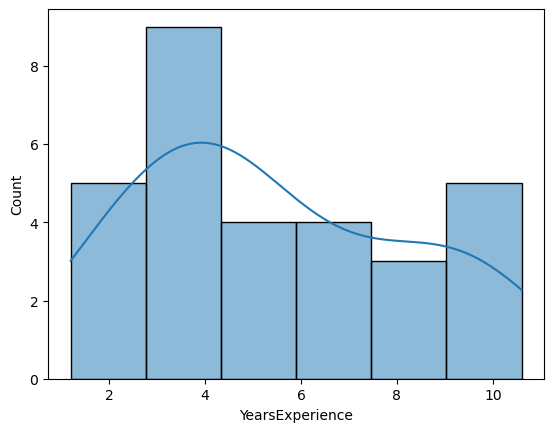

In [21]:
sns.histplot(data=data, x="YearsExperience",kde=True)

<Axes: >

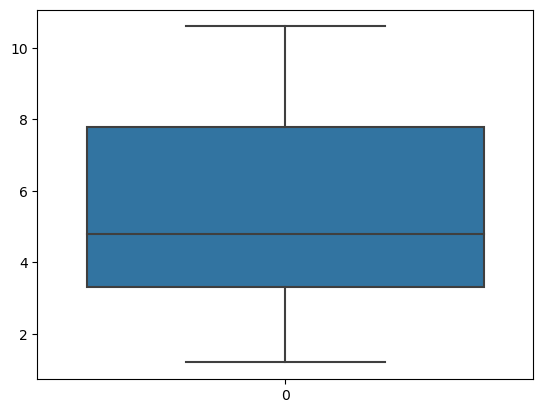

In [22]:
sns.boxplot(data["YearsExperience"]) 

<Axes: >

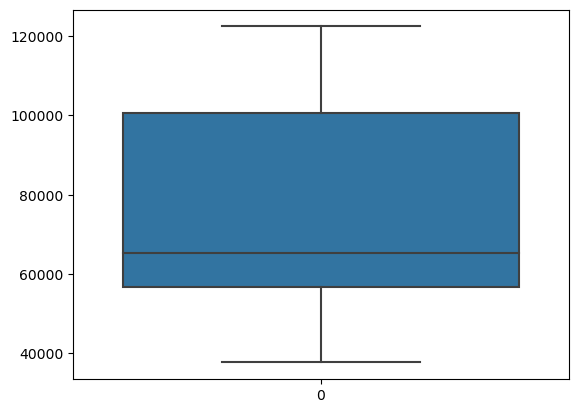

In [23]:

sns.boxplot(data["Salary"]) 

<Axes: xlabel='Salary', ylabel='Count'>

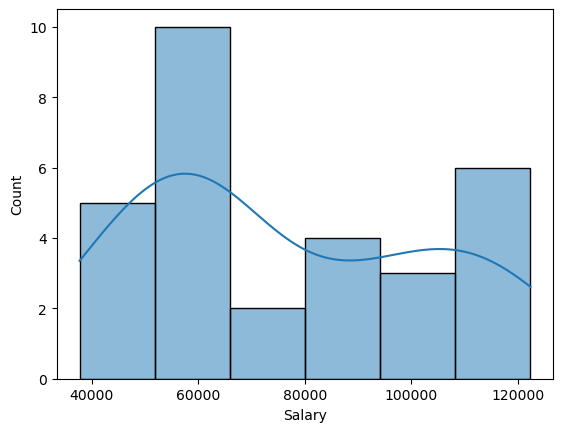

In [26]:
sns.histplot(data=data,x="Salary",kde=True)

In [34]:
X=data[["YearsExperience"]] #bağımsız
y=data[["Salary"]] #bağımlı

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [36]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred=model.predict(X_test)

In [40]:
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

print("Katsayı (b1):", model.coef_)
print("Sabit (b0):", model.intercept_)

R2: 0.9024461774180498
MSE: 49830096.855908334
RMSE: 7059.043621901506
Katsayı (b1): [[9423.81532303]]
Sabit (b0): [24380.20147947]


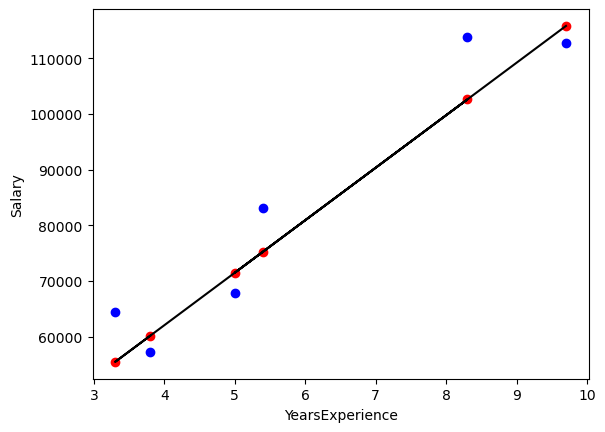

In [44]:
plt.scatter(X_test,y_test,color="blue",label="gerçek maaşlar")
plt.scatter(X_test,y_pred,color="red",label="tahmin edilen maaşlar")

plt.plot(X_test,y_pred,color="black",label="regresyon doğrusu")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()